Fundos Imobiliarios(FIIs), são fundos de investimentos voltados para empreendimentos imobiliários como escritórios, agências, shoppings centers, galpões, dentre outros. São, em sua maioria, negociados em bolsa, facilitando o acesso de pessoas físicas aos principais empreendimentos imobiliários do Brasil com um baixo valor de entrada.

Disclaimer:

 Este Estudo sobre Fundos de Investimento Imobiliário (FIIs) é apenas para fins educacionais e informativos. As informações contidas neste estudo são fornecidas com o propósito de compartilhar conhecimento e facilitar o entendimento sobre o funcionamento e características dos FIIs. No entanto, ressaltamos que este estudo não deve ser interpretado como aconselhamento de investimento ou uma recomendação para comprar, vender ou manter cotas de FIIs.

Risco e Decisões Financeiras: O investimento em Fundos de Investimento Imobiliário envolve riscos e é importante realizar uma análise detalhada, considerando suas circunstâncias financeiras, objetivos e perfil de risco antes de tomar decisões de investimento. As informações apresentadas neste estudo podem não ser completas, precisas ou atualizadas, e não substituem a consulta a um profissional de finanças ou investimentos.

Aconselhamento Profissional: Recomendamos que você busque aconselhamento financeiro, jurídico e tributário de profissionais qualificados antes de tomar qualquer decisão de investimento. Cada investidor tem situações financeiras únicas, e é fundamental avaliar individualmente as informações apresentadas neste estudo à luz das suas próprias circunstâncias.

Variação do Mercado: Os preços das cotas de FIIs podem variar ao longo do tempo devido a fatores de mercado, econômicos e outros. Desempenho passado não é indicativo de resultados futuros.

Responsabilidade: O autor deste estudo não assume responsabilidade por quaisquer perdas, danos ou decisões tomadas com base nas informações contidas neste estudo. A decisão de investir em FIIs é de responsabilidade exclusiva do investidor.

Finalidade Educacional: Este estudo é destinado apenas para fins educacionais e informativos. Os leitores são encorajados a buscar fontes adicionais de informação e a se informar sobre os riscos e benefícios associados ao investimento em FIIs.

Lembre-se de que investir em FIIs envolve riscos e você deve sempre fazer sua própria pesquisa e buscar orientação profissional antes de tomar decisões financeiras.


___

Importando bibliotecas para inicio do estudo

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import yfinance as yf
import datetime
from time import sleep

In [261]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service


In [262]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [341]:
from reportlab.pdfgen import canvas

ModuleNotFoundError: No module named 'reportlab'

In [263]:
pd.set_option('display.max_columns',None)

In [264]:
#rodar essa linha somente se necessario atualizar o driver

#servico = Service(ChromeDriverManager().install())

___

Realizando o Scrap

scrap realizado na pagina: https://www.fundsexplorer.com.br/

colocar codigo do crome driver atualizavel pelo codigo

In [265]:
# Configurações do Selenium
driver = webdriver.Chrome()
url_alvo = 'https://www.fundsexplorer.com.br/ranking'

In [266]:
# Navega para a URL alvo
driver.get(url_alvo)

In [267]:
#selecionar colunas
dropdown_colunas = driver.find_element(By.XPATH, '//*[@id="colunas-ranking__select-button"]')
dropdown_colunas.click()
sleep(5)
selecionar_todos = driver.find_element(By.XPATH, '//*[@id="colunas-ranking__select"]/li[1]/label' )
selecionar_todos.click()
sleep(5)

In [268]:
#//*[@id="colunas-ranking__select"]/li[1]/label

In [269]:
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[6]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [270]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [271]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        quantidade_de_ativos = colunas[24].text
        volatilidade = colunas[25].text
        numero_de_cotistas = colunas[26].text
        taxa_de_gestao = colunas[27].text
        taxa_de_performance = colunas[28].text
        taxa_de_administracao = colunas[29].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, quantidade_de_ativos, volatilidade, numero_de_cotistas,
                              taxa_de_gestao, taxa_de_performance, taxa_de_administracao ])

In [272]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", 
                                         "Ultimo Dividendo(R$)", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Quantidade de Ativos" ,"Volatilidade", "Num. Cotistas",
                                         "Tax. de Gestao", "Tax. de Performance", "Tax. de Administracao" ])



# Finaliza o driver
driver.quit()

In [273]:
data_atual = datetime.date.today().strftime('%Y-%B-%d')
hora_atual = datetime.datetime.now().strftime('%H:%M:%S')
print(f"Dados gerados em: {data_atual} at {hora_atual}.")


Dados gerados em: 2023-October-17 at 16:37:52.


___

In [274]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
0,AAZQ11,INDEFINIDO,"9,31","719.323,71","0,99","0,12","1,28 %","3,84 %","7,67 %","12,10 %","1,28 %","1,28 %","1,51 %","12,10 %","0,21 %","1,50 %","8,39 %","232.223.426,84","9,46","0,98","1,27 %","0,00 %","0,00 %","0,00 %",0,"15,14",18.095,N/A,N/A,N/A
1,ABCP11,SHOPPINGS,"68,00","65.997,61","0,74","0,60","0,89 %","2,29 %","4,44 %","8,98 %","0,76 %","0,74 %","0,75 %","6,73 %","-5,59 %","-4,75 %","-2,83 %","432.465.202,77","91,84","0,74","0,65 %","0,02 %","0,68 %","7,84 %",1,"18,47",17.587,N/A,N/A,N/A
2,AFHI11,PAPÉIS,"97,09","1.064.597,74","1,03","1,05","1,07 %","3,21 %","6,59 %","13,04 %","1,07 %","1,10 %","1,09 %","10,01 %","-0,21 %","0,85 %","11,70 %","320.377.772,86","95,08","1,02","1,10 %","0,12 %","1,22 %","7,57 %",0,"9,01",23.891,N/A,N/A,N/A
3,AGRX11,OUTROS,"10,77","184.467,61",N/A,"0,15","1,40 %","3,77 %","8,53 %","16,15 %","1,26 %","1,42 %","1,35 %","13,24 %","-1,29 %","0,09 %","19,05 %",N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,"21,74",0,N/A,N/A,N/A
4,AIEC11,LAJES CORPORATIVAS,"62,38","711.318,94","0,66","0,76","1,16 %","3,33 %","6,92 %","13,57 %","1,11 %","1,15 %","1,13 %","9,64 %","-3,64 %","-2,52 %","4,10 %","457.867.865,93","94,90","0,66","0,80 %","1,49 %","2,30 %","3,48 %",2,"16,71",15.900,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,XTED11,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"67.378.204,04","28,02","0,31","0,00 %","-0,36 %","-0,36 %","-3,45 %",1,"29,46",4.098,N/A,N/A,N/A
426,YUFI11,FUNDO DE DESENVOLVIMENTO,"88,90","88,50","0,87","0,39","0,00 %","0,00 %","0,85 %","1,09 %","0,00 %","0,14 %","0,09 %","1,09 %","0,00 %","0,00 %",N/A,"50.063.668,92",N/A,N/A,N/A,N/A,N/A,N/A,28,"194,73",56,N/A,N/A,N/A
427,YUFI11B,INDEFINIDO,N/A,N/A,N/A,"0,63","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %",N/A,"0,00 %","0,00 %","0,00 %",N/A,"105,53",N/A,"0,60 %","-0,01 %","0,59 %","6,32 %",0,N/A,N/A,N/A,N/A,N/A
428,ZAVI11,INDEFINIDO,"126,71","680.866,84","0,93","1,16","0,91 %","2,71 %","5,37 %","9,71 %","0,90 %","0,90 %","0,88 %","7,86 %","1,33 %","2,25 %","6,39 %","158.887.138,22",N/A,N/A,N/A,N/A,N/A,N/A,9,"27,68",4.200,N/A,N/A,N/A


In [275]:
df.dtypes

Fundos                     object
Setor                      object
Preço Atual(R$)            object
Liquidez Diária(R$)        object
P/VP                       object
Ultimo Dividendo(R$)       object
Dividend Yield             object
DY (3M) Acumulado          object
DY(6M) Acumulado           object
DY(12M) Acumulado          object
DY(3M) Média               object
DY(6M) Média               object
DY(12M) Média              object
DY Ano                     object
Variação do Preço          object
Rentab. Período            object
Rentab. Acumulada          object
Patrimônio Líquido         object
VPA                        object
P/VPA                      object
DY Patrimonial             object
Variação Patrimonial       object
Rentab. Patr. Período      object
Rentab. Patr. Acumulada    object
Quantidade de Ativos       object
Volatilidade               object
Num. Cotistas              object
Tax. de Gestao             object
Tax. de Performance        object
Tax. de Admini

Converter os campos "object" para "numeric"

In [276]:
df = df.replace('%', '', regex=True)
df = df.replace('\.', '', regex=True)
df = df.replace(',', '.', regex=True)

In [277]:
df = df.replace('N/A', None)

In [278]:
colunas_numericas = ["Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", "Ultimo Dividendo(R$)", "Dividend Yield",
 "DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", 
 "DY Ano", "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", 
 "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos"]
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

Criar uma coluna chamada "Tipo" para agrupar os setores.

In [279]:


# Definir as condições e valores correspondentes
condicoes = [
    (df['Setor'] == 'LAJES CORPORATIVAS')|(df['Setor'] == 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS')|(df['Setor'] == 'SHOPPINGS')|
    (df['Setor'] == 'HOSPITALAR')|(df['Setor'] == 'IMÓVEIS COMERCIAIS - OUTROS')|(df['Setor'] == 'VAREJO')|
    (df['Setor'] == 'IMÓVEIS RESIDENCIAIS')|(df['Setor'] == 'AGÊNCIAS DE BANCOS')|(df['Setor'] == 'EDUCACIONAL')|
    (df['Setor'] == 'HOTÉIS'),    
    (df['Setor'] == 'PAPÉIS'),
    (df['Setor'] == 'FUNDO DE DESENVOLVIMENTO'),
    (df['Setor'] == 'MISTO'),
    (df['Setor'] == 'FUNDO DE FUNDOS'),
    (df['Setor'] == 'FIAGRO'),
    (df['Setor'] == 'INDEFINIDO')
]

valores = ['TIJOLO','PAPÉIS', 'FUNDO DE DESENVOLVIMENTO', 'HIBRIDO', 'FOF','FIAGRO', 'INDEFINIDO',]

# Criar uma nova coluna com base nas condições
df['Tipo'] = np.select(condicoes, valores, default='Outro')
df = df[["Fundos", "Setor", "Tipo", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", "Ultimo Dividendo(R$)", "Dividend Yield",
"DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano",
"Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", "DY Patrimonial",
"Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos" ,"Volatilidade", 
"Num. Cotistas", "Tax. de Gestao", "Tax. de Performance", "Tax. de Administracao"]]


In [280]:
df.loc[df['Fundos'].isin(['AAZQ11', 'AGRX11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11', 'FGAA11', 'FZDA11', 
'FZDB11', 'GCRA11', 'GRWA11', 'IAAG11', 'JGPX11', 'KNCA11', 'LSAG11', 'NCRA11', 'OIAG11', 'PLCA11', 'QAGR11', 'RURA11', 
'RZAG11', 'SNAG11', 'VCRA11','VGIA11', 'XPCA11']), 'Tipo'] = 'FIAGRO'

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   430 non-null    object 
 1   Setor                    418 non-null    object 
 2   Tipo                     430 non-null    object 
 3   Preço Atual(R$)          393 non-null    float64
 4   Liquidez Diária(R$)      382 non-null    float64
 5   P/VP                     365 non-null    float64
 6   Ultimo Dividendo(R$)     430 non-null    float64
 7   Dividend Yield           407 non-null    float64
 8   DY (3M) Acumulado        407 non-null    float64
 9   DY(6M) Acumulado         407 non-null    float64
 10  DY(12M) Acumulado        407 non-null    float64
 11  DY(3M) Média             407 non-null    float64
 12  DY(6M) Média             407 non-null    float64
 13  DY(12M) Média            407 non-null    float64
 14  DY Ano                   4

___

Tratar os campos com valores ausentes ou nulos.

In [282]:
df.shape

(430, 31)

In [283]:
df.isnull().sum()

Fundos                       0
Setor                       12
Tipo                         0
Preço Atual(R$)             37
Liquidez Diária(R$)         48
P/VP                        65
Ultimo Dividendo(R$)         0
Dividend Yield              23
DY (3M) Acumulado           23
DY(6M) Acumulado            23
DY(12M) Acumulado           23
DY(3M) Média                23
DY(6M) Média                23
DY(12M) Média               23
DY Ano                      24
Variação do Preço           23
Rentab. Período             23
Rentab. Acumulada          123
Patrimônio Líquido          35
VPA                        132
P/VPA                      140
DY Patrimonial             132
Variação Patrimonial       132
Rentab. Patr. Período      132
Rentab. Patr. Acumulada    132
Quantidade de Ativos         0
Volatilidade                51
Num. Cotistas                2
Tax. de Gestao             430
Tax. de Performance        430
Tax. de Administracao      430
dtype: int64

In [284]:
#df = df.drop(columns='Vacancia Física')

In [285]:
#df = df.drop(columns='Vacancia Financeira')

In [286]:
#df = df.dropna(how='any')

In [287]:
# Lista de colunas em que necessita remover campos ausentes
colunas_para_remover = ['P/VP', 'P/VPA', 'Dividend Yield', 'Preço Atual(R$)', 'Liquidez Diária(R$)' ]

for coluna in colunas_para_remover:
    df = df.dropna(subset=[coluna])

In [288]:
# Lista de colunas em que necessita remover campos ausentes
colunas_para_remover = ['Preço Atual(R$)', 'P/VP', 'Dividend Yield', 'VPA']

for coluna in colunas_para_remover:
    df = df.dropna(subset=[coluna])

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 424
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   274 non-null    object 
 1   Setor                    274 non-null    object 
 2   Tipo                     274 non-null    object 
 3   Preço Atual(R$)          274 non-null    float64
 4   Liquidez Diária(R$)      274 non-null    float64
 5   P/VP                     274 non-null    float64
 6   Ultimo Dividendo(R$)     274 non-null    float64
 7   Dividend Yield           274 non-null    float64
 8   DY (3M) Acumulado        274 non-null    float64
 9   DY(6M) Acumulado         274 non-null    float64
 10  DY(12M) Acumulado        274 non-null    float64
 11  DY(3M) Média             274 non-null    float64
 12  DY(6M) Média             274 non-null    float64
 13  DY(12M) Média            274 non-null    float64
 14  DY Ano                   2

___

Detecção de Outliers de acordo com os fatores mais importantes a serem observados na escolha do fundo.

P/VP

<AxesSubplot: >

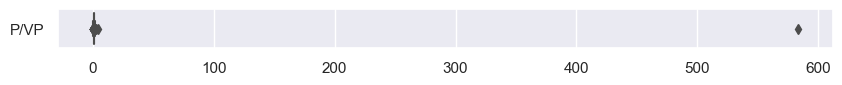

In [290]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VP"]], orient="h")

<AxesSubplot: >

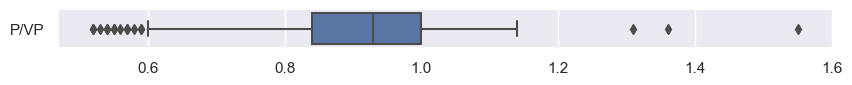

In [291]:
df.drop(df.loc[df['P/VP']>=2].index, inplace=True)
df.drop(df.loc[df['P/VP']<=0.50].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VP"]], orient="h")

P/VPA

<AxesSubplot: >

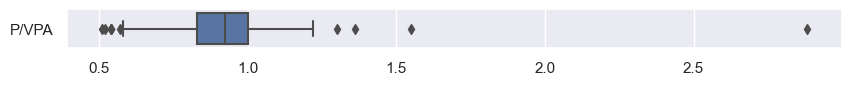

In [292]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VPA"]], orient="h")

<AxesSubplot: >

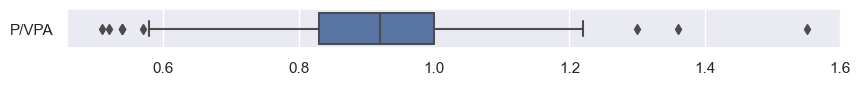

In [293]:
df.drop(df.loc[df['P/VPA']>=2].index, inplace=True)
df.drop(df.loc[df['P/VPA']<=0.5].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VPA"]], orient="h")

Dividend Yeld

<AxesSubplot: >

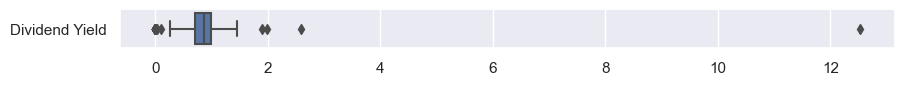

In [294]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Dividend Yield"]], orient="h")

<AxesSubplot: >

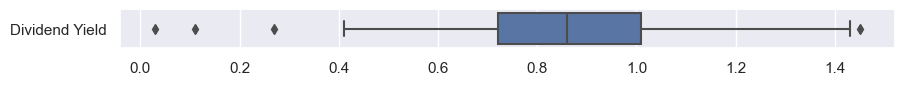

In [295]:
df.drop(df.loc[df['Dividend Yield']>=1.8].index, inplace=True)
df.drop(df.loc[df['Dividend Yield']<=0.02].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Dividend Yield"]], orient="h")

Preço Atual

<AxesSubplot: >

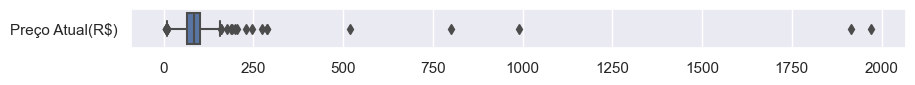

In [296]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Preço Atual(R$)"]], orient="h")

<AxesSubplot: >

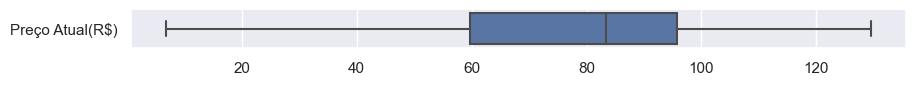

In [297]:
df.drop(df.loc[df['Preço Atual(R$)']>=130.00].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Preço Atual(R$)"]], orient="h")

In [298]:
df.shape

(203, 31)

In [299]:
num_estudos = df.shape[0]
print(f"O estudo segue com {num_estudos} fundos.")

O estudo segue com 203 fundos.


___

Analize dos fundos(melhorar descricao)

In [300]:
df.head(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
0,AAZQ11,INDEFINIDO,FIAGRO,9.31,719323.71,0.99,0.12,1.28,3.84,7.67,12.10,1.28,1.28,1.51,12.10,0.21,1.50,8.39,2.322234e+08,9.46,0.98,1.27,0.00,0.00,0.00,0,15.14,18095,None,None,None
1,ABCP11,SHOPPINGS,TIJOLO,68.00,65997.61,0.74,0.60,0.89,2.29,4.44,8.98,0.76,0.74,0.75,6.73,-5.59,-4.75,-2.83,4.324652e+08,91.84,0.74,0.65,0.02,0.68,7.84,1,18.47,17587,None,None,None
2,AFHI11,PAPÉIS,PAPÉIS,97.09,1064597.74,1.03,1.05,1.07,3.21,6.59,13.04,1.07,1.10,1.09,10.01,-0.21,0.85,11.70,3.203778e+08,95.08,1.02,1.10,0.12,1.22,7.57,0,9.01,23891,None,None,None
4,AIEC11,LAJES CORPORATIVAS,TIJOLO,62.38,711318.94,0.66,0.76,1.16,3.33,6.92,13.57,1.11,1.15,1.13,9.64,-3.64,-2.52,4.10,4.578679e+08,94.90,0.66,0.80,1.49,2.30,3.48,2,16.71,15900,None,None,None
6,ALZM11,FUNDO DE FUNDOS,FOF,92.76,240222.06,1.02,0.80,0.86,2.47,5.21,11.95,0.82,0.87,1.00,8.32,-1.42,-0.58,16.58,6.265947e+07,90.65,1.02,0.88,-2.05,-1.19,2.93,0,21.73,3908,None,None,None


In [301]:
df.sample(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
347,SARE11,MISTO,HIBRIDO,48.61,1592033.23,0.52,0.45,0.86,2.54,5.40,11.30,0.85,0.90,0.94,8.60,-5.73,-4.92,-15.78,8.723633e+08,94.47,0.51,0.48,0.11,0.58,3.47,3,20.76,45498,None,None,None
388,VGIR11,PAPÉIS,PAPÉIS,9.84,4615159.58,1.02,0.12,1.20,3.76,7.66,15.22,1.25,1.28,1.27,11.50,2.68,3.91,14.05,9.941908e+08,9.64,1.02,1.24,0.00,1.24,-88.86,0,10.47,219839,None,None,None
68,CACR11,PAPÉIS,PAPÉIS,103.99,788274.13,1.03,1.42,1.34,4.00,8.39,16.66,1.33,1.40,1.39,12.42,0.08,1.42,15.87,1.841648e+08,101.89,1.02,1.39,-1.58,-0.21,39.36,0,8.81,12874,None,None,None
383,VCRI11,PAPÉIS,PAPÉIS,8.33,359828.55,0.86,0.08,0.90,3.02,7.07,14.92,1.01,1.18,1.24,10.92,-3.47,-2.60,2.38,1.702104e+08,9.58,0.87,0.78,1.38,2.17,3.98,0,12.20,12251,None,None,None
49,BRCO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,125.02,2887915.84,1.03,0.87,0.70,2.11,4.16,8.10,0.70,0.69,0.68,6.74,-0.99,-0.29,35.40,1.789448e+09,121.08,1.03,0.72,-0.33,0.39,9.24,10,16.47,117742,None,None,None


In [302]:
df.tail(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
415,XPCI11,PAPÉIS,PAPÉIS,88.56,2283809.26,0.96,0.95,1.08,3.26,6.49,12.45,1.09,1.08,1.04,10.11,1.09,2.18,19.68,8.047899e+08,92.49,0.96,1.03,0.72,1.75,10.75,0,18.09,76232,None,None,None
420,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,86.69,560414.23,0.83,0.65,0.79,2.35,4.92,10.13,0.78,0.82,0.84,6.76,-1.44,-0.66,18.53,7.431175e+08,103.93,0.83,0.63,0.04,0.66,2.13,98,15.90,44927,None,None,None
421,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,112.00,3542534.39,1.01,0.78,0.69,2.06,4.20,8.74,0.69,0.70,0.73,6.58,0.06,0.75,22.21,2.995316e+09,110.52,1.01,0.71,-2.98,-2.30,9.07,20,12.97,312650,None,None,None
422,XPML11,SHOPPINGS,TIJOLO,112.54,16027895.23,1.01,0.85,0.75,2.32,4.69,9.46,0.77,0.78,0.79,6.28,3.92,4.70,21.60,3.462052e+09,112.32,1.00,0.76,11.27,12.12,20.14,12,13.95,357599,None,None,None
424,XPSF11,FUNDO DE FUNDOS,FOF,8.28,538300.23,0.95,0.08,0.90,2.65,5.75,11.99,0.88,0.96,1.00,8.95,-4.59,-3.73,19.67,3.797920e+08,8.77,0.94,0.86,5.03,5.93,-88.92,0,16.51,52474,None,None,None


os mais pagadores por tipo, os maiores dividendos, maior pagador, menor pagador


RENTABILIDADE DOS ULTIMOS 12 MESES

___

Geral

In [303]:
df_teste = df[(df['P/VPA'] <= 1)]
df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]
df_teste2 = df_teste2.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
pd.Dataframe=df_teste2
df_teste2.head(10)


C:\Users\dougl\AppData\Local\Temp\ipykernel_20824\1765953071.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]


,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
343,RZAK11,PAPÉIS,PAPÉIS,91.96,3004029.48,1.02,1.30,1.38,3.84,7.81,15.85,1.28,1.30,1.32,11.52,-1.07,0.29,7.75,8.196114e+08,92.51,0.99,1.41,-1.28,0.11,10.89,0,17.57,49711,None,None,None
85,CRAA11,INDEFINIDO,FIAGRO,100.98,128627.84,0.99,1.30,1.27,3.81,8.32,9.78,1.27,1.39,1.63,9.78,-0.63,0.63,7.83,5.026407e+07,101.46,1.00,1.28,0.00,0.00,0.00,0,5.98,1495,None,None,None
107,EGAF11,INDEFINIDO,FIAGRO,98.94,730414.35,1.00,1.29,1.28,4.18,8.20,25.74,1.39,1.37,2.15,12.33,1.00,2.30,10.65,1.871408e+08,98.85,1.00,1.31,0.00,0.00,0.00,0,9.68,6465,None,None,None
252,MORC11,PAPÉIS,PAPÉIS,92.85,483549.03,0.95,1.24,1.34,3.55,7.23,14.26,1.18,1.21,1.19,9.60,-1.05,0.28,6.37,1.876803e+08,98.37,0.94,1.26,0.77,2.04,7.30,0,10.20,6619,None,None,None
323,RCFF11,FUNDO DE FUNDOS,FOF,83.01,415.00,0.88,1.23,1.32,1.32,4.19,4.19,0.44,0.84,0.84,1.32,0.00,0.00,NaN,3.060969e+07,91.47,0.91,1.35,-2.74,-1.44,0.33,0,70.10,83,None,None,None
135,FVPQ11,SHOPPINGS,TIJOLO,118.51,80417.26,0.62,1.20,1.00,2.92,6.25,10.72,0.97,1.04,0.89,9.02,-5.38,-4.43,30.74,5.381427e+08,192.01,0.62,0.63,-0.14,0.49,2.16,1,22.02,3936,None,None,None
380,URPR11,PAPÉIS,PAPÉIS,90.21,2791099.45,0.89,1.17,1.25,3.56,7.71,15.09,1.19,1.29,1.26,11.68,-3.99,-2.79,4.14,1.173462e+09,100.51,0.90,1.16,1.72,2.90,27.38,0,13.47,92429,None,None,None
214,KNCR11,PAPÉIS,PAPÉIS,101.08,12977933.16,1.01,1.10,1.09,3.45,6.96,13.83,1.15,1.16,1.15,10.43,1.27,2.38,13.41,5.765512e+09,100.98,1.00,1.09,0.23,1.32,14.69,0,8.43,288834,None,None,None
382,VCRA11,INDEFINIDO,FIAGRO,96.73,718953.45,0.93,1.10,1.14,3.67,7.44,15.32,1.22,1.24,1.28,11.19,0.49,1.63,1.70,4.735138e+08,103.07,0.94,1.07,0.67,1.74,3.23,0,14.13,6322,None,None,None
281,PLCA11,INDEFINIDO,FIAGRO,89.95,69781.61,0.95,1.10,1.23,3.71,7.56,14.49,1.24,1.26,1.21,11.08,-1.18,0.03,4.01,5.283230e+07,94.85,0.95,1.16,0.00,0.00,0.00,0,33.41,1875,None,None,None


In [304]:
novo_df = df_teste2[['Setor','Fundos', 'Ultimo Dividendo(R$)', 'P/VPA', 'Preço Atual(R$)']]

In [305]:
novo_df = novo_df.sort_values(by='Ultimo Dividendo(R$)', ascending=False)

In [306]:
novo_df.sample(5)

,Setor,Fundos,Ultimo Dividendo(R$),P/VPA,Preço Atual(R$)
27,PAPÉIS,BCRI11,0.70,0.71,68.63
255,PAPÉIS,NAVT11,1.00,0.89,83.30
356,PAPÉIS,SNAG11,0.10,1.00,10.16
310,VAREJO,RBRD11,0.34,0.58,38.60
45,FUNDO DE FUNDOS,BPFF11,0.62,0.89,69.29


In [307]:
novo_df.groupby(['Setor'])['Ultimo Dividendo(R$)'].count().reset_index().sort_values(by='Ultimo Dividendo(R$)', ascending=False)

,Setor,Ultimo Dividendo(R$)
10,PAPÉIS,34
7,INDEFINIDO,18
2,FUNDO DE FUNDOS,17
5,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,10
8,LAJES CORPORATIVAS,7
9,MISTO,5
6,IMÓVEIS RESIDENCIAIS,3
11,SHOPPINGS,3
0,AGÊNCIAS DE BANCOS,2
12,VAREJO,2


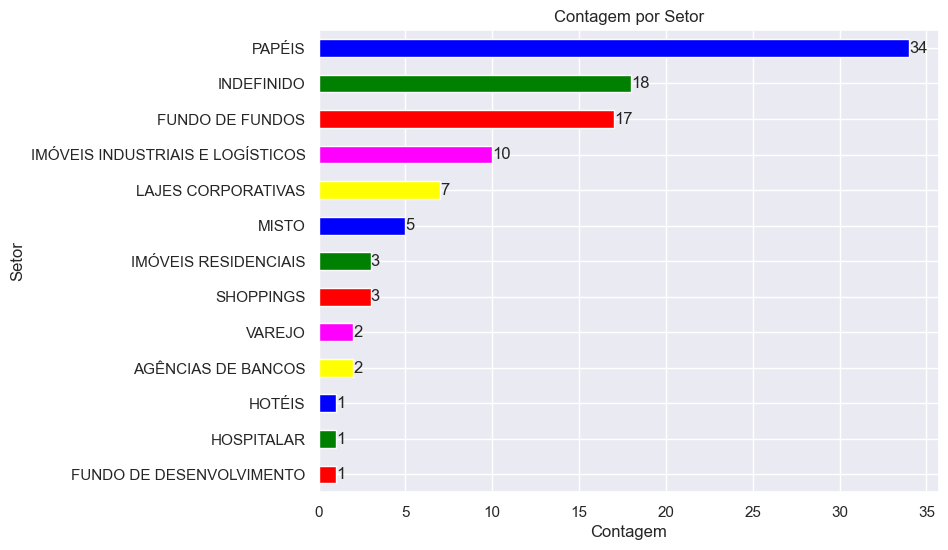

In [308]:
contagem_setor = novo_df['Setor'].value_counts().sort_values(ascending=True)
cores = ['red', 'green', 'blue', 'yellow', 'magenta']
ax = contagem_setor.plot(kind='barh', figsize=(8, 6), color=cores)
plt.title('Contagem por Setor')
plt.xlabel('Contagem')
plt.ylabel('Setor')
for i, v in enumerate(contagem_setor):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()

melhorar esse grafico

In [309]:
df_geral = df.sort_values(by='P/VPA')
df_geral2 = df_geral.sort_values(by='Preço Atual(R$)', ascending=True)
df_geral2


,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
40,BLMR11,FUNDO DE FUNDOS,FOF,6.81,405025.58,0.88,0.05,0.76,2.39,5.02,11.07,0.80,0.84,0.92,8.13,-4.14,-3.41,8.74,1.987879e+08,7.78,0.88,0.68,0.52,1.20,4.07,0,18.20,18992,None,None,None
33,BIME11,INDEFINIDO,INDEFINIDO,7.38,61692.94,0.85,0.08,1.07,3.15,6.64,12.21,1.05,1.11,1.02,10.09,-1.59,-0.53,7.10,5.068437e+07,8.67,0.85,0.92,-3.99,-3.10,3.90,2,16.86,8779,None,None,None
395,VIUR11,MISTO,HIBRIDO,7.80,357504.84,0.86,0.07,0.89,2.60,5.34,11.42,0.87,0.89,0.95,8.65,-3.58,-2.73,11.05,2.440442e+08,9.06,0.86,0.79,-1.52,-0.74,-89.65,8,18.22,44133,None,None,None
147,GSFI11,SHOPPINGS,TIJOLO,7.94,1764099.74,0.56,0.00,0.03,0.03,0.03,0.03,0.01,0.00,0.00,0.03,0.00,0.03,0.03,1.076309e+09,11.90,0.67,0.01,0.01,0.02,0.02,9,19.58,7697,None,None,None
390,VIFI11,FUNDO DE FUNDOS,FOF,8.13,168833.48,0.87,0.07,0.84,2.50,5.18,10.61,0.83,0.86,0.88,8.05,-2.10,-1.28,29.89,7.572047e+07,9.36,0.87,0.75,5.76,6.55,-67.41,0,17.09,6512,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,BNFS11,AGÊNCIAS DE BANCOS,TIJOLO,122.72,130418.65,1.36,1.41,1.15,3.62,7.44,14.58,1.21,1.24,1.22,10.92,0.11,1.26,11.17,6.311890e+07,90.17,1.36,1.56,-1.35,0.20,6.69,18,14.79,4965,None,None,None
370,TGAR11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,123.21,4327692.13,1.07,1.43,1.12,3.42,6.87,13.83,1.14,1.15,1.15,10.30,4.59,5.76,16.41,1.580079e+09,114.63,1.07,1.25,-10.29,-9.17,1.28,8,13.26,118820,None,None,None
49,BRCO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,125.02,2887915.84,1.03,0.87,0.70,2.11,4.16,8.10,0.70,0.69,0.68,6.74,-0.99,-0.29,35.40,1.789448e+09,121.08,1.03,0.72,-0.33,0.39,9.24,10,16.47,117742,None,None,None
168,HGRE11,LAJES CORPORATIVAS,TIJOLO,128.24,2241061.71,0.83,0.78,0.57,1.69,3.89,8.04,0.56,0.65,0.67,5.97,-0.75,-0.18,17.23,1.831606e+09,154.99,0.83,0.50,-1.21,-0.71,-0.40,17,23.17,146764,None,None,None


___

Análise de Fundos de Investimento Imobiliário: Estratégias para Identificar Oportunidades de Investimento

Os Fundos de Investimento Imobiliário (FIIs) têm ganhado destaque no cenário financeiro como uma alternativa atrativa para investidores que buscam exposição ao mercado imobiliário sem a necessidade de aquisição direta de propriedades. No entanto, a variedade de opções disponíveis requer uma análise criteriosa para selecionar os melhores investimentos. Neste contexto, três parâmetros-chave podem ser considerados: o índice P/VP, o índice P/VPA e o dividend yield.

1. Índice P/VP (Preço/Valor Patrimonial)

O índice P/VP é uma métrica que compara o preço atual da cota do FII ao seu valor patrimonial por cota. Um P/VP abaixo de 1 indica que a cota está sendo negociada a um preço inferior ao seu valor patrimonial, o que pode ser um sinal de subvalorização. Isso pode indicar uma oportunidade interessante, pois sugere que os investidores estão comprando ativos imobiliários a um preço abaixo do seu valor intrínseco.

2. Índice P/VPA (Preço/Valor Patrimonial por Ação)

O índice P/VPA é uma variação do P/VP, mas leva em consideração o valor patrimonial por ação (VPA) ao invés da cota como um todo. Um P/VPA abaixo de 1 indica que a cota está sendo negociada a um preço inferior ao seu valor patrimonial por ação. Isso pode ser um sinal de que o mercado não está refletindo completamente o valor dos ativos imobiliários contidos no FII. Um baixo índice P/VPA pode sugerir uma margem de segurança e potencial de valorização.

3. Dividend Yield

O dividend yield é a relação entre os dividendos anuais distribuídos pelo FII e o preço atual da cota. Um alto dividend yield indica que o fundo está distribuindo uma parcela significativa dos seus ganhos aos investidores. No contexto dos FIIs, onde a distribuição de rendimentos é uma característica fundamental, um alto dividend yield pode ser uma indicação de fluxo de caixa estável e atraente para os investidores que buscam renda passiva.

Considerações Finais

A análise de fundos de investimento imobiliário baseada nos parâmetros P/VP, P/VPA e dividend yield pode ser uma abordagem útil para identificar oportunidades de investimento. No entanto, é importante lembrar que essas métricas devem ser avaliadas em conjunto com outras informações e fatores. Uma análise completa envolve também considerações sobre a qualidade dos ativos do FII, o histórico de desempenho, a gestão do fundo e as perspectivas do mercado imobiliário.

Além disso, o risco associado aos investimentos em FIIs não deve ser ignorado. A análise de risco, liquidez e objetivos financeiros individuais também desempenham um papel crucial na tomada de decisões de investimento. Portanto, é recomendável que os investidores busquem aconselhamento financeiro profissional e realizem pesquisas aprofundadas antes de tomar decisões de investimento em Fundos de Investimento Imobiliário.






___

In [310]:
df["Tipo"].value_counts()

TIJOLO                      74
PAPÉIS                      54
FOF                         29
FIAGRO                      20
HIBRIDO                     11
INDEFINIDO                  10
FUNDO DE DESENVOLVIMENTO     5
Name: Tipo, dtype: int64

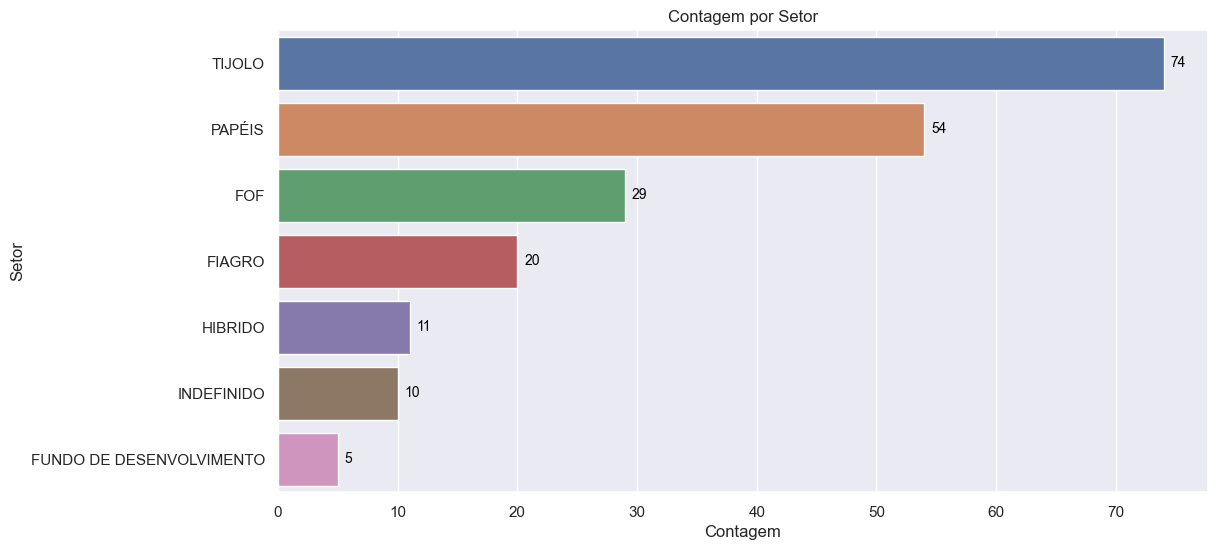

In [311]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Tipo', data=df, order=df['Tipo'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Contagem')
plt.ylabel('Setor')
plt.title('Contagem por Setor')
plt.show()


___

Functions(melhorar descri;'ao)

In [312]:
def setup_seaborn_date_range():
    sns.set_theme(style="darkgrid")    
    data_atual = datetime.date.today()
    um_ano_atras = data_atual - datetime.timedelta(days=365)
    start_date = um_ano_atras.strftime('%Y-%m-%d')
    end_date = data_atual.strftime('%Y-%m-%d')
    
    return start_date, end_date
start_date, end_date = setup_seaborn_date_range()

In [313]:
def chart_padrao():
    plt.xlabel("Data")
    plt.ylabel("Preço")
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

    return 

In [314]:
def calcular_medias_moveis(historical_data):
    # Calcula as médias móveis de 7 e 21 dias
    historical_data['mm7'] = historical_data['Close'].rolling(7).mean()
    historical_data['mm21d'] = historical_data['Close'].rolling(21).mean()
    return historical_data


___

In [315]:
# Tipos de fundos que você deseja filtrar
tipos_de_fundos = ['FUNDO DE DESENVOLVIMENTO', 'INDEFINIDO', 'HIBRIDO', 'FIAGRO', 'FOF', 'PAPÉIS']

# Dicionário para armazenar os DataFrames resultantes
resultados = {}

# Loop para filtrar e classificar os DataFrames
for tipo in tipos_de_fundos:
    filtro = (df['Tipo'] == tipo) & (df['P/VP'] <= 1) & (df['P/VPA'] <= 1)
    df_filtrado = df[filtro].sort_values(by='Dividend Yield', ascending=False)
    resultados[tipo] = df_filtrado

# Agora, você tem os DataFrames resultantes armazenados em 'resultados'


___

___

* Setor: Fundo de Desenvolvimento

In [316]:
df_f_desenvolvimento = resultados['FUNDO DE DESENVOLVIMENTO']
df_f_desenvolvimento.head(5)


,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
245,MFII11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,92.97,471168.52,0.94,1.08,1.14,3.38,6.94,13.92,1.13,1.16,1.16,10.45,-1.04,0.09,12.09,4.381633e+08,98.98,0.94,1.09,-6.38,-5.36,4.63,8,11.81,29954,None,None,None
317,RBRS11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,54.30,71439.94,0.58,0.40,0.72,2.15,4.40,9.07,0.72,0.73,0.76,6.68,0.54,1.27,10.05,1.635980e+08,94.33,0.58,0.42,0.26,0.68,6.71,2,41.34,1237,None,None,None
234,LUGG11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,86.65,46597.13,0.70,0.60,0.67,2.07,4.47,8.90,0.69,0.75,0.74,6.81,0.00,0.67,30.60,1.395222e+08,123.39,0.70,0.49,-3.44,-2.97,4.54,5,16.46,5672,None,None,None
276,PATC11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,72.71,1097486.77,0.95,0.34,0.46,2.87,6.11,9.93,0.96,1.02,0.83,9.93,2.08,2.55,19.29,2.668673e+08,76.74,0.95,0.44,0.46,0.90,-3.66,7,20.30,7127,None,None,None


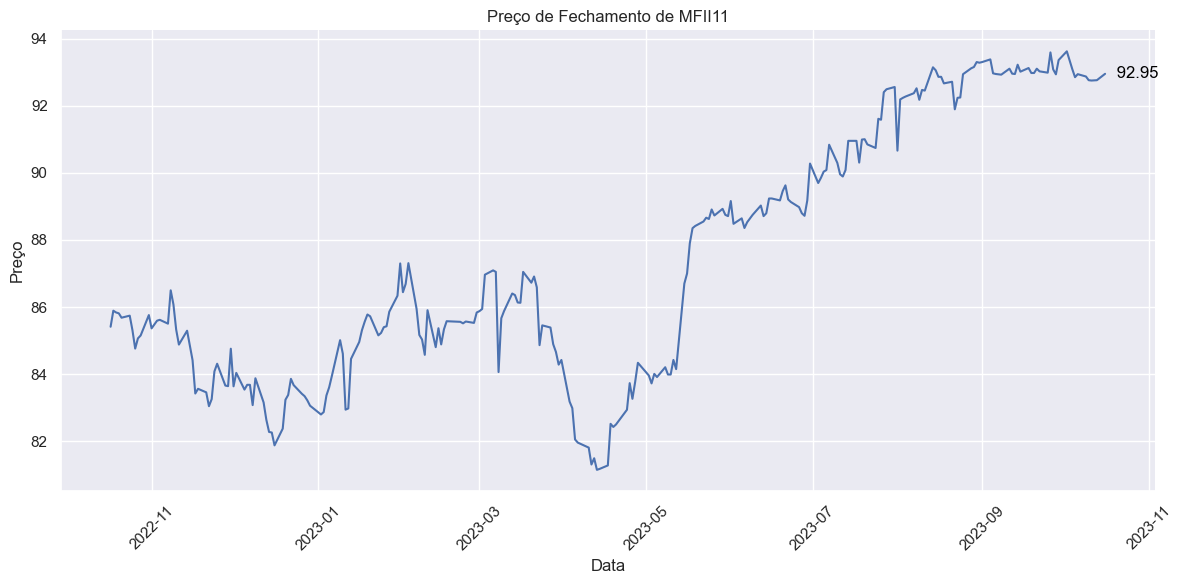

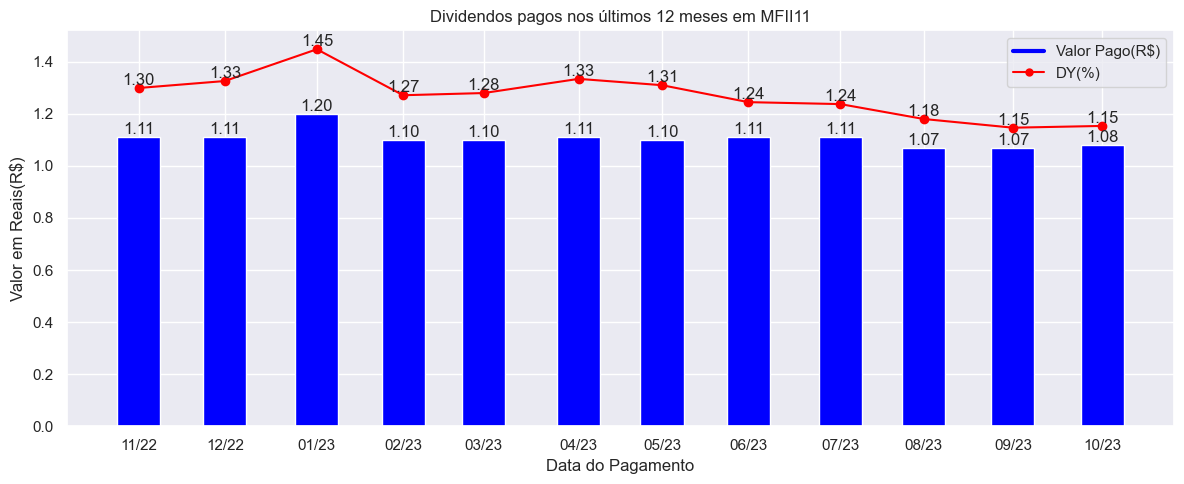

In [318]:
#gerando o ticker
fundo_maior_dividendo = df_f_desenvolvimento.nlargest(1, 'Dividend Yield')
ticker_f_desenvolvimento = fundo_maior_dividendo['Fundos'].values[0]
ticker_f_desenvolvimento_completo = ticker_f_desenvolvimento + '.SA'

#gerando historico
fund = yf.Ticker(ticker_f_desenvolvimento_completo)
historical_data = fund.history(start=start_date, end=end_date)

# Calculo das mm7 e mm21
calcular_medias_moveis(historical_data)

#criando coluna com valor pa DY
historical_data['DY'] = historical_data['Dividends']/ historical_data['Close'] * 100

#indexando a data
historical_data["data_pregao"] = historical_data.index
preco_atual = historical_data.iloc[-1]['Close']

#gerando grafico historico
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_desenvolvimento}")

chart_padrao()


# Obtém os dados históricos da ação filtrado por dividendos
df_filtrado = historical_data[historical_data['Dividends'] != 0]
df_filtrado = df_filtrado.sort_values(by='data_pregao', ascending=False)

# gerando o gráfico de barras
plt.figure(figsize=(12, 5))
bars = plt.bar(df_filtrado['data_pregao'], df_filtrado['Dividends'], width=15, color='blue')
plt.xlabel('Data do Pagamento')
plt.ylabel('Valor Pago por Cota(R$)')
plt.title(f'Dividendos pagos nos últimos 12 meses em {ticker_f_desenvolvimento}')
plt.xticks(df_filtrado['data_pregao'], df_filtrado['data_pregao'].dt.strftime('%m/%y'), rotation=0)

for bar, valor in zip(bars, df_filtrado['Dividends']):
    plt.text(bar.get_x() + bar.get_width() / 2, valor, f'{valor:.2f}', ha='center', va='bottom')

# gerando o gráfico de linhas (novo)
plt.yscale('linear')
plt.plot(df_filtrado['data_pregao'], df_filtrado['DY'], color='red', marker='o', label='Outra Coluna')
plt.ylabel('Valor em Reais(R$)')

# Adicione os valores no gráfico de linha
for x, y in zip(df_filtrado['data_pregao'], df_filtrado['DY']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Adicione as representações à legenda
custom_lines = [
    Line2D([0], [0], color='blue', lw=3, label='Barras'),
    Line2D([0], [0], color='red', marker='o', markersize=5, label='Linha')
]

plt.legend(custom_lines, ['Valor Pago(R$)', 'DY(%)'], loc='upper right')

plt.tight_layout()
plt.show()




In [319]:
# vou colar um dia pra frente  o df pq se naão eu vou ver o valor da previção já dado,
#ou seja vou rodar o modelo já sabendo o valor kkkk
df_historic_mais_um = historical_data
df_historic_mais_um['Close'] = df_historic_mais_um['Close'].shift(-1)

# vamos apagar os dados nulos pq o modelo não vai ler essas infos NaN
df_historic_mais_um.dropna(inplace=True)

df_historic_mais_um["data_pregao"] = df_historic_mais_um.index

#reindexando o data frame
df_historic_mais_um = df_historic_mais_um.reset_index(drop=True)


In [320]:
#verificando quantidade de linhas
qtd_linhas = len(df_historic_mais_um)

qtd_linhas_treino= round(.60 * qtd_linhas)
qtd_linhas_teste= 300 
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:137 linhas teste= 137:436 linhas validação= 228'

In [321]:
#separando as features e labels
features = df_historic_mais_um.drop(['Close','data_pregao'], 1)
labels = df_historic_mais_um['Close']

C:\Users\dougl\AppData\Local\Temp\ipykernel_20824\3724552715.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df_historic_mais_um.drop(['Close','data_pregao'], 1)


In [322]:
#Agora vamos escolher as melhores variaveis para da nossa base de dados com Kbest


##################################################################################

features_list = ('Open','High','Low','Volume','mm7','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'Volume': 159.9292311785548, 'High': 107.70441864460263, 'Low': 90.84584856818094, 'mm21d': 1.5238942046132293, 'mm7': 1.4001957128612357}


C:\Users\dougl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\dougl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [323]:
#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

137 137
92 92


In [324]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [325]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:59.78'

In [335]:
valor_novo = features.tail()
#valor_novo

In [339]:
data_pregao_full=df_historic_mais_um['data_pregao']
data_pregao=data_pregao_full.tail(92)

res_full=df_historic_mais_um['Close']
res=res_full.tail(92)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

df.head()

,real,previsao
data_pregao,,
2023-06-05 00:00:00-03:00,88.356537,88.502973
2023-06-06 00:00:00-03:00,88.528473,88.090746
2023-06-07 00:00:00-03:00,88.748169,87.877193
2023-06-09 00:00:00-03:00,89.025185,88.245138
2023-06-12 00:00:00-03:00,88.709969,88.698564


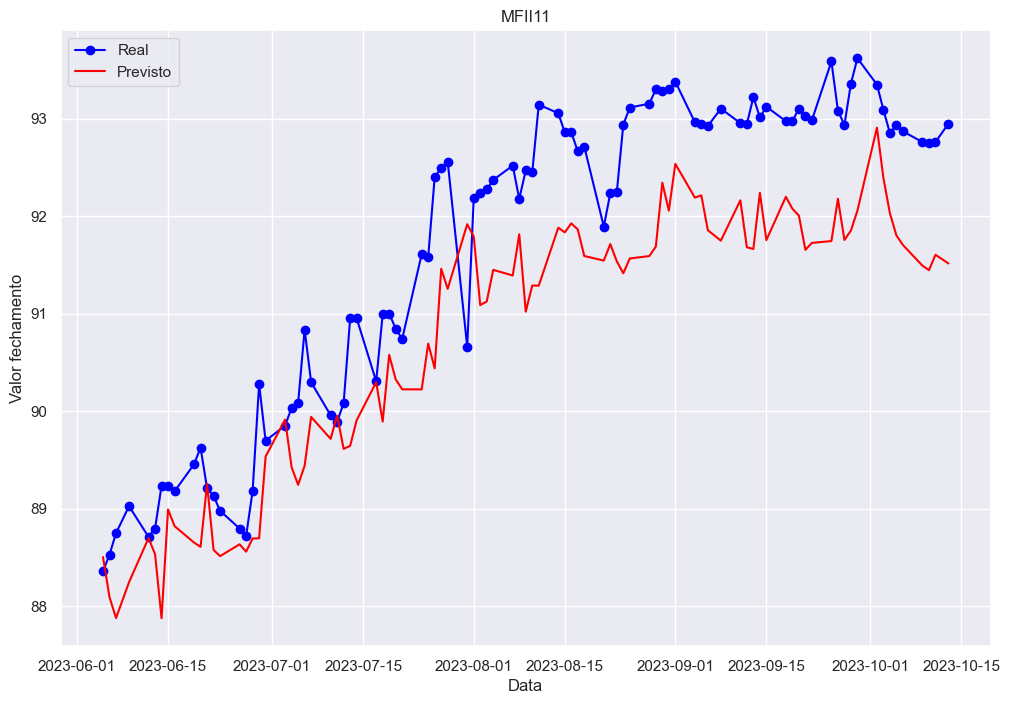

In [337]:
#plotagem
plt.figure(figsize=(12, 8))
plt.title(ticker_f_desenvolvimento)
plt.plot(df["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

___

___

* Setor: Indefinido

In [329]:
df_f_indefinido = resultados['INDEFINIDO']
df_f_indefinido.head(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
138,GAME11,INDEFINIDO,INDEFINIDO,9.18,145033.00,0.94,0.10,1.08,3.22,6.60,13.36,1.07,1.10,1.11,10.08,-0.86,0.21,16.06,2.124328e+08,9.79,0.94,1.02,-0.51,0.51,-98.83,0,9.35,23885,None,None,None
33,BIME11,INDEFINIDO,INDEFINIDO,7.38,61692.94,0.85,0.08,1.07,3.15,6.64,12.21,1.05,1.11,1.02,10.09,-1.59,-0.53,7.10,5.068437e+07,8.67,0.85,0.92,-3.99,-3.10,3.90,2,16.86,8779,None,None,None
97,CYCR11,INDEFINIDO,INDEFINIDO,9.46,252327.13,0.97,0.10,1.05,3.21,6.84,14.05,1.07,1.14,1.17,10.43,1.60,2.66,18.76,1.596676e+08,9.79,0.97,1.02,2.62,3.67,-88.82,0,17.94,13610,None,None,None
93,CXCI11,INDEFINIDO,INDEFINIDO,86.02,121030.42,0.89,0.85,0.97,2.86,6.00,12.37,0.95,1.00,1.03,9.23,-2.34,-1.39,25.82,1.996910e+08,97.04,0.89,0.88,4.22,5.13,7.39,0,17.40,5324,None,None,None
193,IRIM11,INDEFINIDO,INDEFINIDO,85.00,66173.45,0.92,0.78,0.90,2.77,6.15,11.99,0.92,1.03,1.00,9.58,-6.17,-5.32,0.97,1.819088e+08,92.34,0.92,0.84,-5.12,-4.32,-0.68,0,15.07,2824,None,None,None


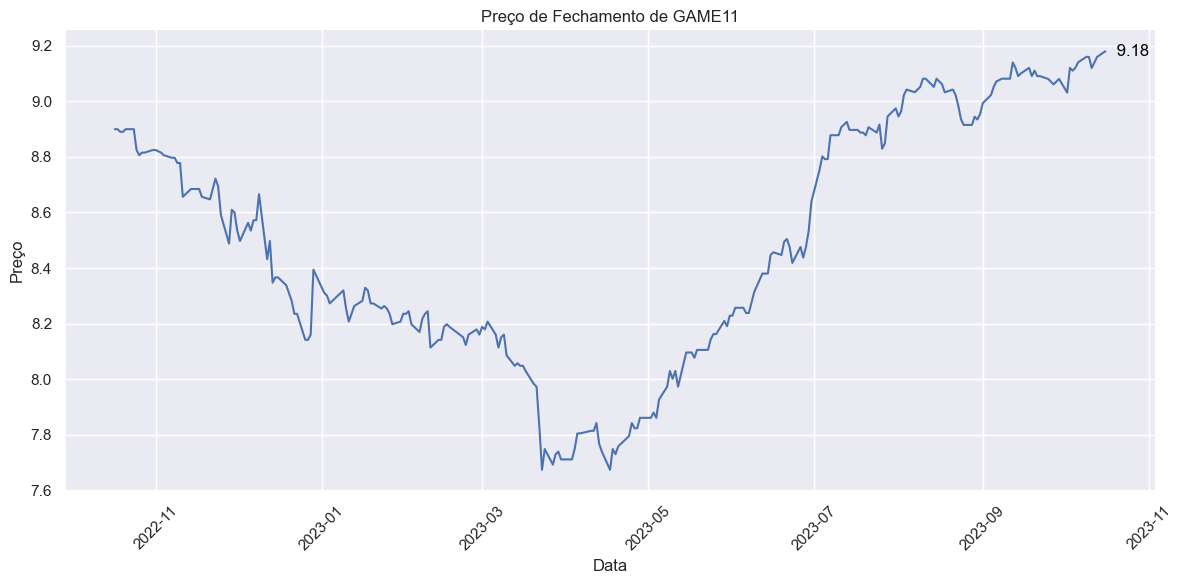

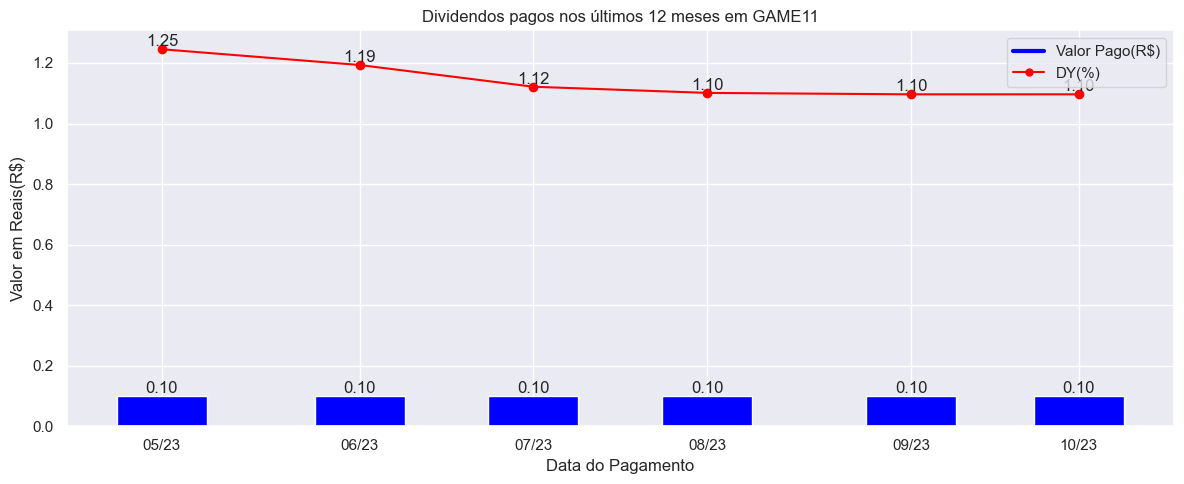

In [330]:
indefinido_maior_dividendo = df_f_indefinido.nlargest(1, 'Dividend Yield')
ticker_f_indefinido = indefinido_maior_dividendo['Fundos'].values[0]
ticker_f_indefinido_completo = ticker_f_indefinido + '.SA'

fund = yf.Ticker(ticker_f_indefinido_completo)
historical_data = fund.history(start=start_date, end=end_date)



# Calcula as médias móveis de 7 e 21 dias
historical_data['mm7'] = historical_data['Close'].rolling(7).mean()
historical_data['mm21d'] = historical_data['Close'].rolling(21).mean()
#criando coluna com valor pa DY
historical_data['DY'] = historical_data['Dividends']/ historical_data['Close'] * 100
#indexando a data
historical_data["data_pregao"] = historical_data.index



preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_indefinido}")

chart_padrao()

# Obtém os dados históricos da ação
df_filtrado = historical_data[historical_data['Dividends'] != 0]
df_filtrado = df_filtrado.sort_values(by='data_pregao', ascending=False)

# Código para o gráfico de barras (já existente)
plt.figure(figsize=(12, 5))
bars = plt.bar(df_filtrado['data_pregao'], df_filtrado['Dividends'], width=15, color='blue')
plt.xlabel('Data do Pagamento')
plt.ylabel('Valor Pago por Cota(R$)')
plt.title(f'Dividendos pagos nos últimos 12 meses em {ticker_f_indefinido}')
plt.xticks(df_filtrado['data_pregao'], df_filtrado['data_pregao'].dt.strftime('%m/%y'), rotation=0)

for bar, valor in zip(bars, df_filtrado['Dividends']):
    plt.text(bar.get_x() + bar.get_width() / 2, valor, f'{valor:.2f}', ha='center', va='bottom')

# Código para o gráfico de linhas (novo)
plt.yscale('linear')
plt.plot(df_filtrado['data_pregao'], df_filtrado['DY'], color='red', marker='o', label='Outra Coluna')
plt.ylabel('Valor em Reais(R$)')

# Adicione os valores no gráfico de linha
for x, y in zip(df_filtrado['data_pregao'], df_filtrado['DY']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Adicione as representações à legenda
custom_lines = [
    Line2D([0], [0], color='blue', lw=3, label='Barras'),
    Line2D([0], [0], color='red', marker='o', markersize=5, label='Linha')
]

plt.legend(custom_lines, ['Valor Pago(R$)', 'DY(%)'], loc='upper right')

plt.tight_layout()
plt.show()

___

___

* Setor: Hibrido

In [331]:
df_f_hibrido.head(5)

NameError: name 'df_f_hibrido' is not defined

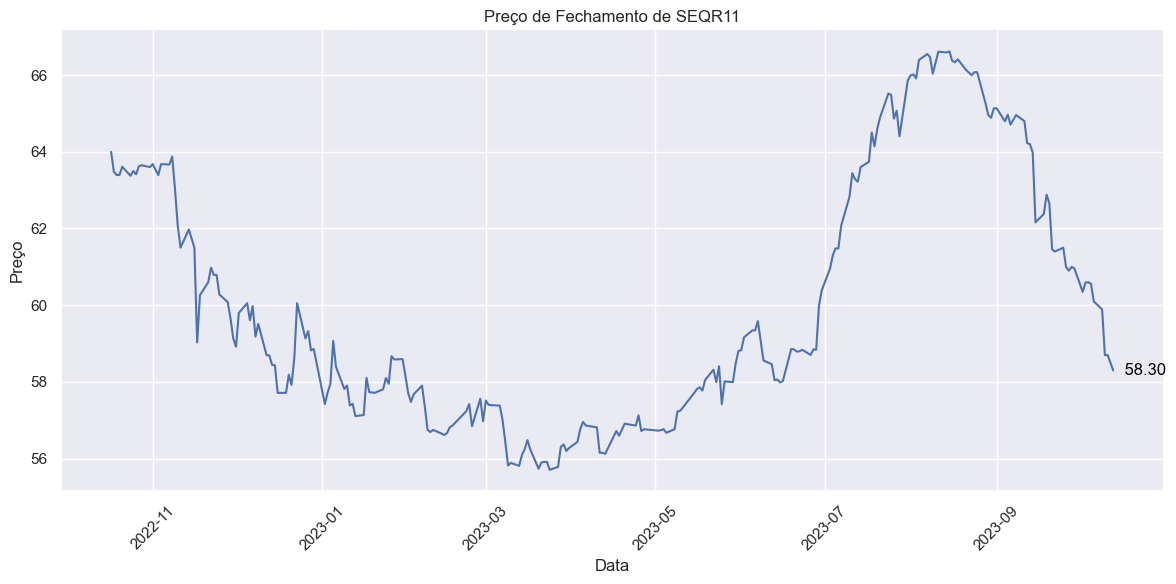

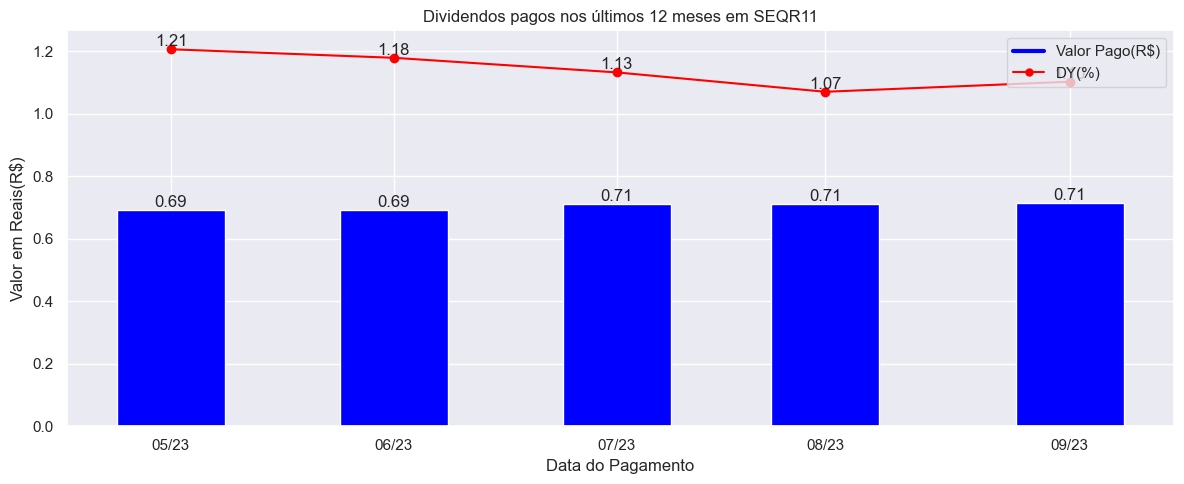

In [ ]:
hibrido_maior_dividendo = df_f_hibrido.nlargest(1, 'Dividend Yield')
ticker_f_hibrido = hibrido_maior_dividendo['Fundos'].values[0]
ticker_f_hibrido_completo = ticker_f_hibrido + '.SA'

sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_hibrido_completo)
historical_data = fund.history(start=start_date, end=end_date)
# Calcula as médias móveis de 7 e 21 dias
historical_data['mm7'] = historical_data['Close'].rolling(7).mean()
historical_data['mm21d'] = historical_data['Close'].rolling(21).mean()
#criando coluna com valor pa DY
historical_data['DY'] = historical_data['Dividends']/ historical_data['Close'] * 100
#indexando a data
historical_data["data_pregao"] = historical_data.index



preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_hibrido}")

chart_padrao()

# Obtém os dados históricos da ação
df_filtrado = historical_data[historical_data['Dividends'] != 0]
df_filtrado = df_filtrado.sort_values(by='data_pregao', ascending=False)

# Código para o gráfico de barras (já existente)
plt.figure(figsize=(12, 5))
bars = plt.bar(df_filtrado['data_pregao'], df_filtrado['Dividends'], width=15, color='blue')
plt.xlabel('Data do Pagamento')
plt.ylabel('Valor Pago por Cota(R$)')
plt.title(f'Dividendos pagos nos últimos 12 meses em {ticker_f_hibrido}')
plt.xticks(df_filtrado['data_pregao'], df_filtrado['data_pregao'].dt.strftime('%m/%y'), rotation=0)

for bar, valor in zip(bars, df_filtrado['Dividends']):
    plt.text(bar.get_x() + bar.get_width() / 2, valor, f'{valor:.2f}', ha='center', va='bottom')

# Código para o gráfico de linhas (novo)
plt.yscale('linear')
plt.plot(df_filtrado['data_pregao'], df_filtrado['DY'], color='red', marker='o', label='Outra Coluna')
plt.ylabel('Valor em Reais(R$)')

# Adicione os valores no gráfico de linha
for x, y in zip(df_filtrado['data_pregao'], df_filtrado['DY']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Adicione as representações à legenda
custom_lines = [
    Line2D([0], [0], color='blue', lw=3, label='Barras'),
    Line2D([0], [0], color='red', marker='o', markersize=5, label='Linha')
]

plt.legend(custom_lines, ['Valor Pago(R$)', 'DY(%)'], loc='upper right')

plt.tight_layout()
plt.show()

___

* Setor: Fiagro

In [ ]:
df_f_fiagro = df[(df['Tipo'] == 'FIAGRO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_fiagro = df_f_fiagro.sort_values(by='Dividend Yield', ascending=False)
df_f_fiagro.head(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
266,OIAG11,INDEFINIDO,FIAGRO,9.41,263352.69,0.96,0.13,1.31,3.90,7.39,16.20,1.30,1.23,1.35,11.97,-1.76,-0.47,0.57,8.882346e+07,9.83,0.96,1.27,0.0,0.00,0.00,0,17.09,9969,None,None,None
0,AAZQ11,INDEFINIDO,FIAGRO,9.35,731200.90,0.97,0.12,1.28,3.84,7.67,12.10,1.28,1.28,1.51,12.10,0.21,1.50,8.39,2.322234e+08,9.66,0.97,1.24,0.0,0.00,0.00,0,15.18,18095,None,None,None
107,EGAF11,INDEFINIDO,FIAGRO,98.99,730900.83,1.00,1.29,1.28,4.18,8.20,25.74,1.39,1.37,2.15,12.33,1.00,2.30,10.65,1.871408e+08,99.07,1.00,1.51,0.0,0.00,0.00,0,9.70,6465,None,None,None
85,CRAA11,INDEFINIDO,FIAGRO,100.71,134020.38,0.99,1.30,1.27,3.81,8.32,9.78,1.27,1.39,1.63,9.78,-0.63,0.63,7.83,5.026407e+07,101.58,0.99,1.34,0.0,0.00,0.00,0,6.02,1495,None,None,None
386,VGIA11,INDEFINIDO,FIAGRO,9.39,4103079.66,0.99,0.12,1.26,3.96,8.12,16.76,1.32,1.35,1.40,12.54,-0.10,1.15,7.29,8.221711e+08,9.51,0.99,1.37,-0.2,1.17,9.41,0,11.91,138563,None,None,None


In [ ]:
fiagro_maior_dividendo = df_f_fiagro.nlargest(1, 'Dividend Yield')
ticker_f_fiagro = fiagro_maior_dividendo['Fundos'].values[0]
ticker_f_fiagro_completo = ticker_f_fiagro + '.SA'

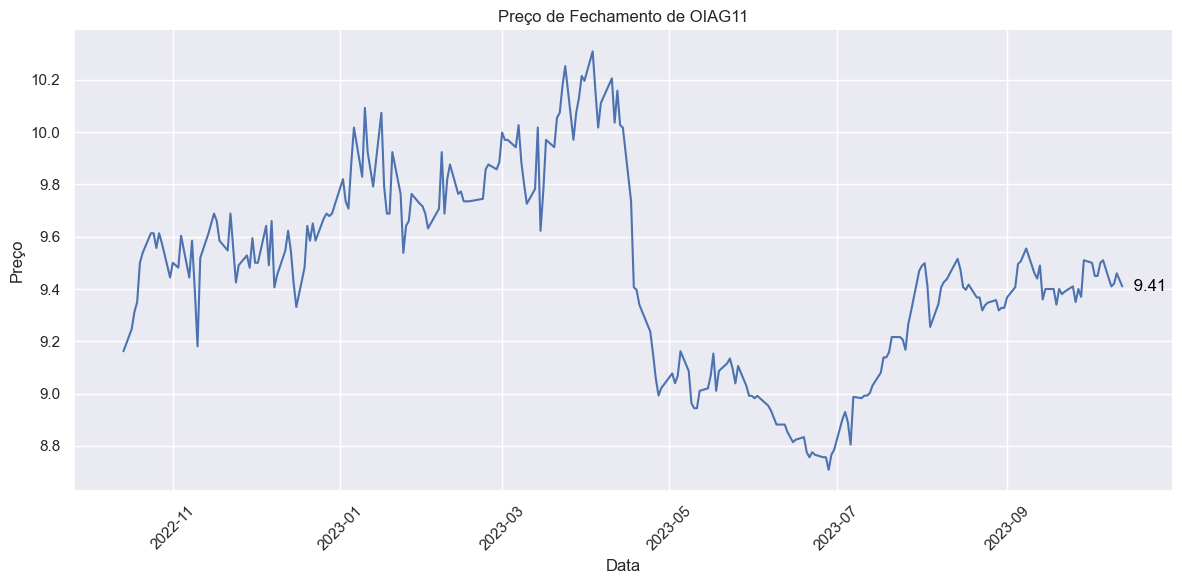

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_fiagro_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_fiagro}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

* Setor: FOF

In [ ]:
df_f_fof = df[(df['Tipo'] == 'FOF') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_fof = df_f_fof.sort_values(by='Dividend Yield', ascending=False)
df_f_fof.head(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
323,RCFF11,FUNDO DE FUNDOS,FOF,83.01,415.00,0.89,1.23,1.32,1.32,4.19,4.19,0.44,0.84,0.84,1.32,0.00,0.00,NaN,3.003434e+07,91.47,0.91,1.35,-2.74,-1.44,0.33,0,69.62,86,None,None,None
203,JSAF11,FUNDO DE FUNDOS,FOF,96.52,1099592.17,0.97,1.00,1.00,2.90,6.06,12.72,0.97,1.01,1.06,9.54,1.39,2.41,29.63,1.559392e+08,99.13,0.97,1.01,5.52,6.59,15.07,0,20.95,10789,None,None,None
270,OUFF11,FUNDO DE FUNDOS,FOF,70.26,188131.66,0.91,0.72,0.98,2.95,6.25,12.77,0.98,1.04,1.06,8.50,-0.54,0.43,25.07,1.405764e+08,77.48,0.91,0.93,2.08,3.03,9.45,3,13.13,7835,None,None,None
104,DVFF11,FUNDO DE FUNDOS,FOF,83.84,50018.93,0.88,0.80,0.98,2.84,5.79,12.15,0.95,0.97,1.01,8.92,-4.96,-4.02,25.06,1.051773e+08,95.53,0.88,0.84,4.86,5.74,15.44,0,23.74,714,None,None,None
331,RFOF11,FUNDO DE FUNDOS,FOF,76.30,127655.97,0.93,0.75,0.94,2.80,5.70,11.72,0.93,0.95,0.98,8.79,-2.28,-1.36,24.44,8.879091e+07,82.35,0.93,0.91,3.01,3.95,5.21,0,18.91,4889,None,None,None


In [ ]:
fof_maior_dividendo = df_f_fof.nlargest(1, 'Dividend Yield')
ticker_f_fof = fof_maior_dividendo['Fundos'].values[0]
ticker_f_fof_completo = ticker_f_fof + '.SA'

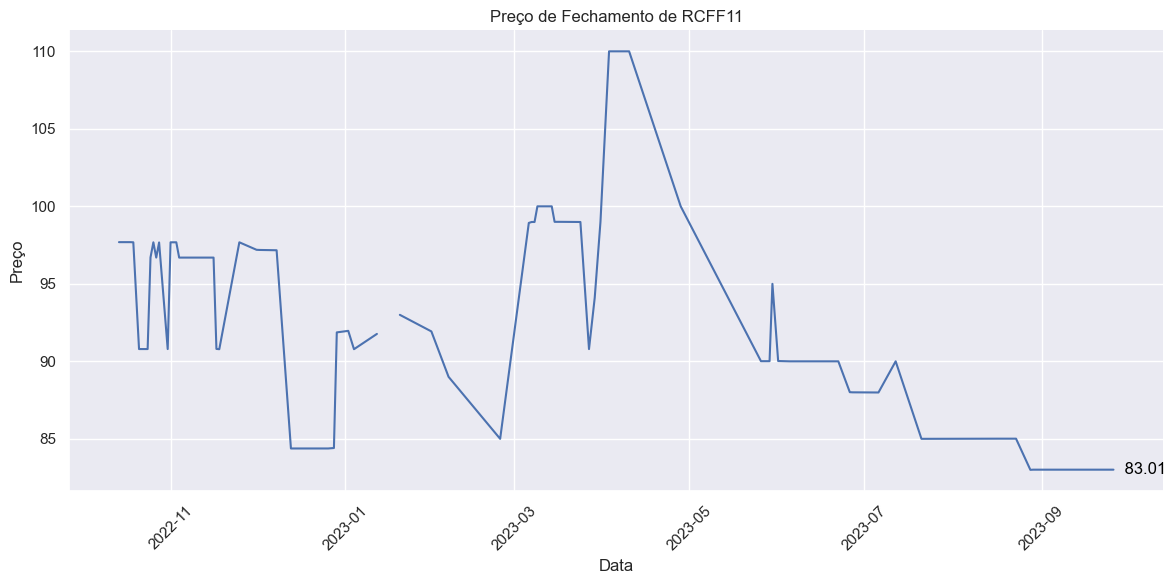

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_fof_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_fof}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

* Setor: Papéis

In [ ]:
df_f_papeis = df[(df['Tipo'] == 'PAPÉIS') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_papeis = df_f_papeis.sort_values(by='Dividend Yield', ascending=False)
df_f_papeis.head(5)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
252,MORC11,PAPÉIS,PAPÉIS,92.64,490489.76,0.94,1.24,1.34,3.55,7.23,14.26,1.18,1.21,1.19,9.60,-1.05,0.28,6.37,1.876803e+08,98.37,0.94,1.26,0.77,2.04,7.30,0,10.27,6619,None,None,None
380,URPR11,PAPÉIS,PAPÉIS,89.84,2825841.07,0.88,1.17,1.25,3.56,7.71,15.09,1.19,1.29,1.26,11.68,-3.99,-2.79,4.14,1.190607e+09,101.98,0.88,1.14,3.21,4.38,29.21,0,13.48,93145,None,None,None
187,IBCR11,PAPÉIS,PAPÉIS,80.00,167303.34,0.83,1.00,1.24,3.79,7.31,13.60,1.26,1.22,1.13,10.83,4.91,6.21,6.13,9.235776e+07,96.36,0.83,1.02,2.60,3.64,12.41,0,16.02,4120,None,None,None
346,SADI11,PAPÉIS,PAPÉIS,85.20,512024.41,0.89,1.00,1.16,3.43,7.01,13.96,1.14,1.17,1.16,10.52,-2.27,-1.14,3.94,1.483620e+08,95.80,0.89,1.04,-3.27,-2.26,8.39,0,10.22,10242,None,None,None
304,RBHG11,PAPÉIS,PAPÉIS,89.31,307628.62,0.98,1.05,1.16,3.50,7.30,14.81,1.17,1.22,1.23,11.01,0.00,1.16,17.31,1.571294e+08,90.95,0.98,1.15,-1.23,-0.09,10.58,0,10.40,9735,None,None,None


In [ ]:
papeis_maior_dividendo = df_f_papeis.nlargest(1, 'Dividend Yield')
ticker_f_papeis = papeis_maior_dividendo['Fundos'].values[0]
ticker_f_papeis_completo = ticker_f_fof + '.SA'

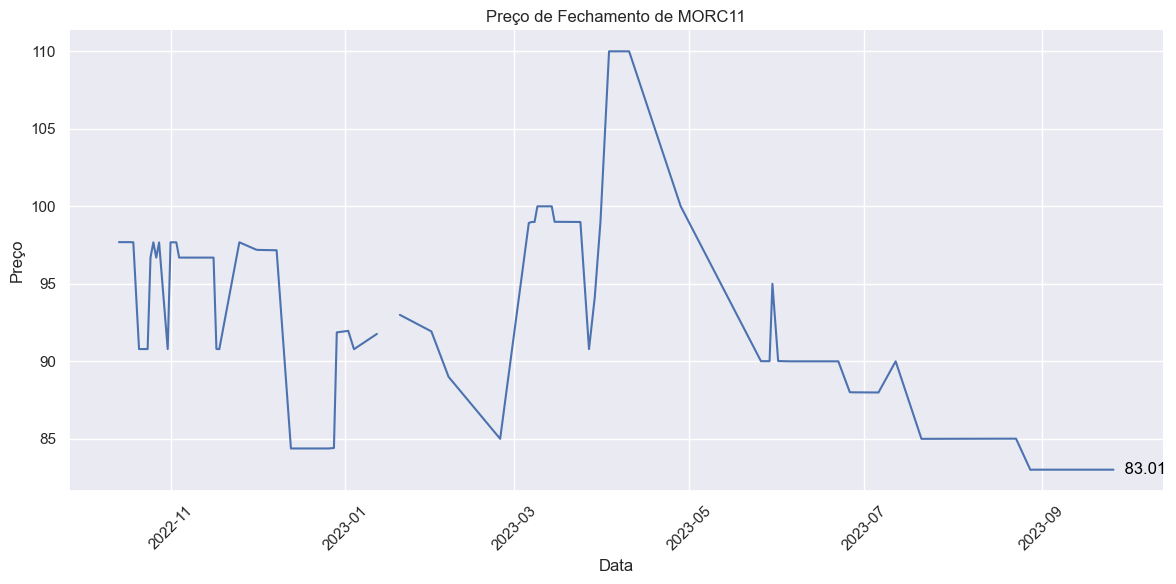

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_papeis_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_papeis}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

tijolo tem queser diferente

___

* Setor: Tijolo

In [ ]:
df_f_tijolo = df[(df['Tipo'] == 'TIJOLO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_tijolo = df_f_tijolo.sort_values(by='Dividend Yield', ascending=False)


In [ ]:
df_f_tijolo['Setor'].value_counts()

LAJES CORPORATIVAS                  18
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    17
SHOPPINGS                           12
IMÓVEIS RESIDENCIAIS                 4
VAREJO                               2
AGÊNCIAS DE BANCOS                   2
HOSPITALAR                           2
HOTÉIS                               1
EDUCACIONAL                          1
Name: Setor, dtype: int64

<AxesSubplot: ylabel='Setor'>

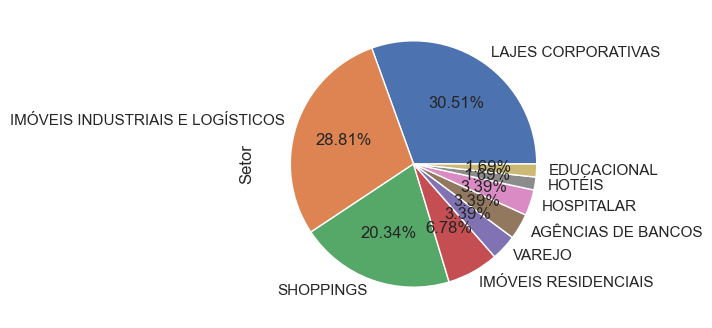

In [ ]:
plt.figure(figsize=(4,4))
df_f_tijolo["Setor"].value_counts().plot(kind="pie", autopct="%.2f%%")

* IMÓVEIS INDUSTRIAIS E LOGÍSTICOS

In [ ]:
df_f_tijolo_IIL = df_f_tijolo[(df_f_tijolo['Setor']=='IMÓVEIS INDUSTRIAIS E LOGÍSTICOS')]
df_f_tijolo_IIL.head(3)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
38,BLMG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,57.50,472594.31,0.66,0.68,1.16,3.34,6.57,13.07,1.11,1.10,1.09,10.07,-4.05,-2.94,-16.59,3.335124e+08,87.52,0.66,0.80,-8.78,-8.05,-4.08,1,24.07,13828,None,None,None
272,OULG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,40.34,131504.59,0.59,0.42,1.02,3.04,6.21,10.51,1.01,1.04,0.88,8.32,-1.74,-0.74,3.98,1.682194e+08,67.80,0.59,0.62,1.33,1.96,-5.61,2,19.97,5108,None,None,None
283,PLOG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,TIJOLO,66.71,70165.04,0.63,0.70,0.99,3.05,6.10,12.13,1.02,1.02,1.01,4.09,2.01,3.02,0.55,7.964807e+07,100.39,0.66,0.75,-0.02,0.72,8.77,1,16.63,3284,None,None,None


In [ ]:

df_f_tijolo_IIL_maior_dividendo = df_f_tijolo_IIL.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_IIL = df_f_tijolo_IIL_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_IIL_completo = ticker_f_df_f_tijolo_IIL + '.SA'

In [ ]:
import datetime
import seaborn as sns

def setup_seaborn_and_date_range():
    sns.set_theme(style="darkgrid")
    
    data_atual = datetime.date.today()
    um_ano_atras = data_atual - datetime.timedelta(days=365)
    start_date = um_ano_atras.strftime('%Y-%m-%d')
    end_date = data_atual.strftime('%Y-%m-%d')
    
    return start_date, end_date

# Exemplo de uso:
start_date, end_date = setup_seaborn_and_date_range()
print(f"Período: {start_date} - {end_date}")


Período: 2022-10-14 - 2023-10-14


sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')


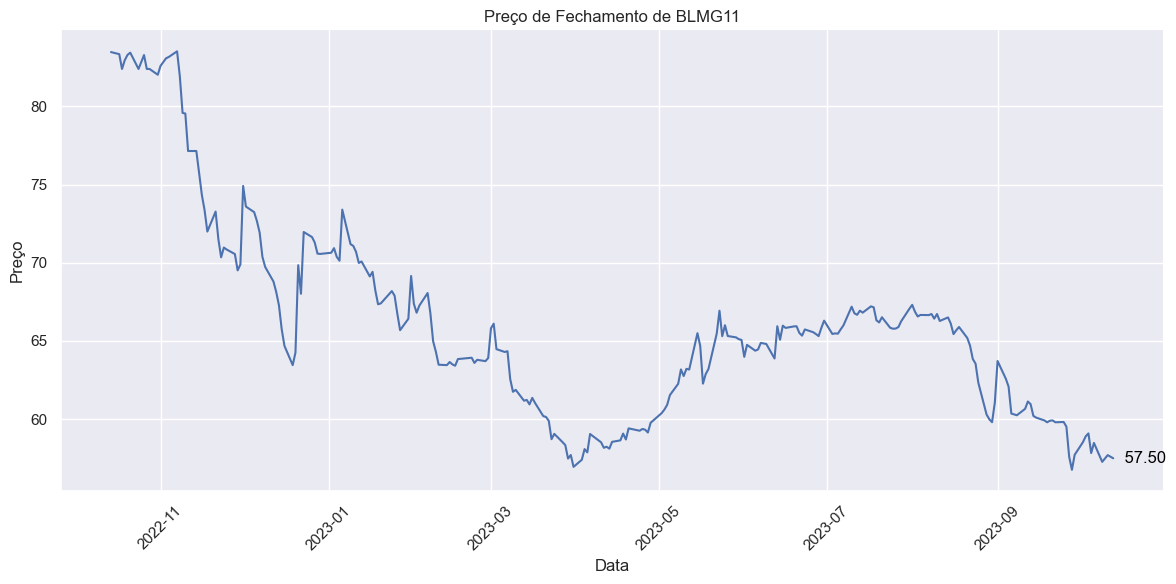

In [ ]:



fund = yf.Ticker(ticker_f_df_f_tijolo_IIL_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_IIL}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

LAJES CORPORATIVAS

In [ ]:
df_f_tijolo_LC = df_f_tijolo[(df_f_tijolo['Setor']=='LAJES CORPORATIVAS')]
df_f_tijolo_LC.head(3)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
4,AIEC11,LAJES CORPORATIVAS,TIJOLO,62.40,726822.62,0.66,0.76,1.16,3.33,6.92,13.57,1.11,1.15,1.13,9.64,-3.64,-2.52,4.10,4.578679e+08,94.90,0.66,0.80,1.49,2.30,3.48,2,16.76,15900,None,None,None
363,SPTW11,LAJES CORPORATIVAS,TIJOLO,41.19,94144.24,0.74,0.46,1.10,3.19,6.29,12.49,1.06,1.05,1.04,9.48,0.67,1.78,12.56,1.006665e+08,55.99,0.74,0.82,0.45,1.27,16.29,1,14.04,27785,None,None,None
149,GTWR11,LAJES CORPORATIVAS,TIJOLO,82.55,1246545.07,0.87,0.79,0.94,2.79,5.75,11.74,0.93,0.96,0.98,8.93,-3.45,-2.54,15.47,1.141234e+09,95.10,0.87,0.83,0.42,1.26,6.60,3,17.75,31332,None,None,None


In [ ]:
df_f_tijolo_LC_maior_dividendo = df_f_tijolo_LC.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_LC = df_f_tijolo_LC_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_LC_completo = ticker_f_df_f_tijolo_LC + '.SA'

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')

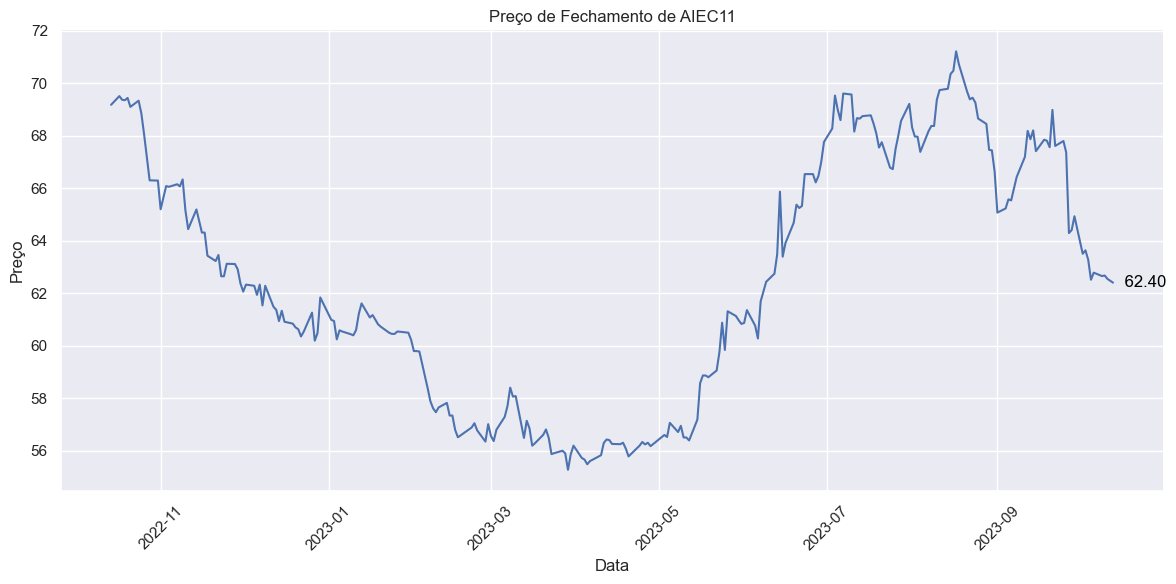

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_LC_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_LC}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

SHOPPING

In [ ]:
df_f_tijolo_SH = df_f_tijolo[(df_f_tijolo['Setor']=='SHOPPINGS')]
df_f_tijolo_SH.head(3)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
135,FVPQ11,SHOPPINGS,TIJOLO,118.51,76865.83,0.62,1.20,1.00,2.92,6.25,10.72,0.97,1.04,0.89,9.02,-5.38,-4.43,30.74,5.381427e+08,192.18,0.62,0.62,-0.05,0.58,2.25,1,22.08,3936,None,None,None
402,VSHO11,SHOPPINGS,TIJOLO,77.40,165975.10,0.77,0.74,0.98,2.82,5.81,11.37,0.94,0.97,0.95,8.91,-2.69,-1.73,21.11,2.122149e+08,101.11,0.77,0.73,1.75,2.50,7.24,3,20.98,3617,None,None,None
1,ABCP11,SHOPPINGS,TIJOLO,67.80,68193.38,0.74,0.60,0.89,2.29,4.44,8.98,0.76,0.74,0.75,6.73,-5.59,-4.75,-2.83,4.326613e+08,91.88,0.74,0.54,0.07,0.61,7.77,1,18.50,17747,None,None,None


In [ ]:
df_f_tijolo_SH_maior_dividendo = df_f_tijolo_SH.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_SH = df_f_tijolo_SH_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_SH_completo = ticker_f_df_f_tijolo_SH + '.SA'

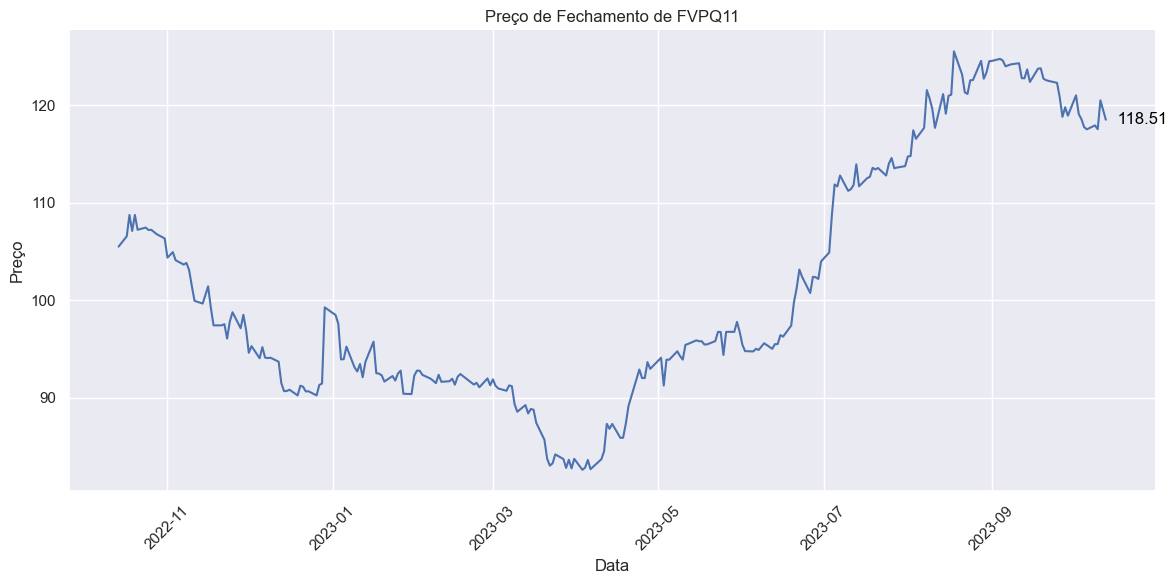

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_SH_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_SH}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

HOTEIS

In [ ]:
df_f_tijolo_HT = df_f_tijolo[(df_f_tijolo['Setor']=='HOTÉIS')]
df_f_tijolo_HT.head(3)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
248,MGHT11,HOTÉIS,TIJOLO,50.95,98152.93,0.59,0.5,0.9,2.69,6.52,13.9,0.9,1.09,1.16,10.52,-14.19,-13.42,7.72,1.129694e+08,85.99,0.59,0.7,0.48,1.18,-4.28,1,23.73,4442,None,None,None


In [ ]:
df_f_tijolo_HT_maior_dividendo = df_f_tijolo_HT.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_HT = df_f_tijolo_HT_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_HT_completo = ticker_f_df_f_tijolo_HT + '.SA'

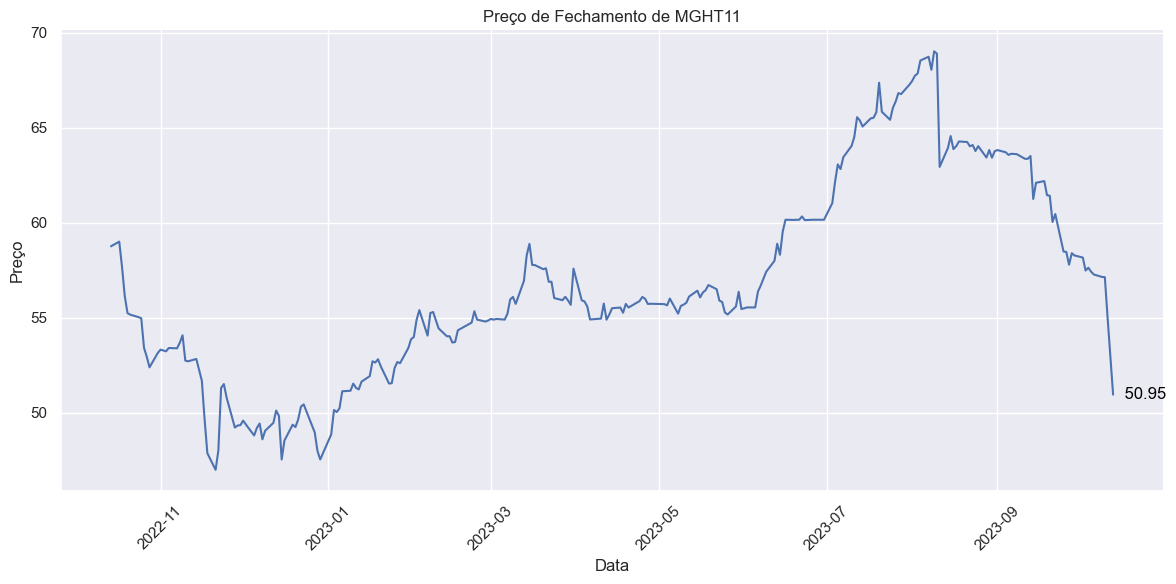

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_HT_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_HT}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

AGÊNCIAS DE BANCOS

In [ ]:
df_f_tijolo_AB = df_f_tijolo[(df_f_tijolo['Setor']=='AGÊNCIAS DE BANCOS')]
df_f_tijolo_AB.head(3)

,Fundos,Setor,Tipo,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,DY(3M) Média,DY(6M) Média,DY(12M) Média,DY Ano,Variação do Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos,Volatilidade,Num. Cotistas,Tax. de Gestao,Tax. de Performance,Tax. de Administracao
23,BBPO11,AGÊNCIAS DE BANCOS,TIJOLO,96.75,1815419.70,0.90,0.90,0.93,2.76,5.67,11.93,0.92,0.95,0.99,8.85,-0.98,-0.06,23.58,1.576342e+09,99.02,0.98,0.91,-1.48,-0.59,16.38,63,10.28,74877,None,None,None
91,CXAG11,AGÊNCIAS DE BANCOS,TIJOLO,79.68,110630.14,0.69,0.71,0.86,2.52,5.43,11.48,0.84,0.91,0.96,8.37,-1.67,-0.82,16.59,2.417827e+08,115.65,0.69,0.61,0.87,1.49,20.82,32,12.71,12010,None,None,None


In [ ]:
df_f_tijolo_AB_maior_dividendo = df_f_tijolo_AB.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_AB = df_f_tijolo_AB_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_AB_completo = ticker_f_df_f_tijolo_AB + '.SA'

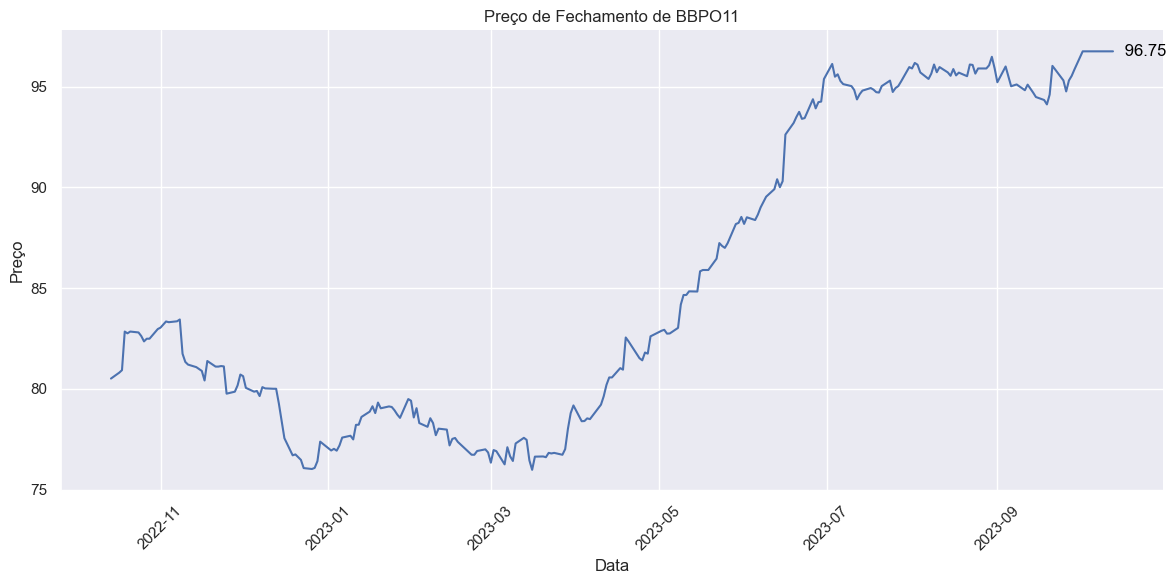

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_AB_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_AB}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

//*[@id="carbon_fields_fiis_dividends-2"]/div[2]/div[2]

//*[@id="carbon_fields_fiis_dividends-2"]/div[2]/div[2]

fazer scrap em fiis.com.br

exemplo : https://fiis.com.br/habt11/

___


no acima precisa colocar a cotacao nos ultimo ano, mes e 12 meses


https://www.clubefii.com.br/fiis/RZTR11

In [ ]:
//*[@id="dividends-chart"]/div[1]/canvas

SyntaxError: invalid syntax (7345415.py, line 1)

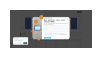

In [ ]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
# Inicializar o driver do Selenium (certifique-se de ter o ChromeDriver ou o WebDriver apropriado instalado)
driver = webdriver.Chrome()

# Crie uma instância do driver Selenium e defina a resolução da janela
options = webdriver.ChromeOptions()
options.add_argument("--window-size=1920,1080")  # Defina a resolução desejada

# Abrir a URL
url = "https://www.fundsexplorer.com.br/funds/mfii11"
driver.get(url)

# Aguardar até que a página esteja completamente carregada
wait = WebDriverWait(driver, 40)
wait.until(EC.presence_of_element_located((By.ID, 'dividends-chart')))

# Localizar o elemento do canvas usando o XPath
canvas_element = driver.find_element(By.XPATH, '//*[@id="carbon_fields_fiis_dividends-2"]')

# Aguardar até que o elemento canvas esteja presente
wait.until(EC.visibility_of(canvas_element))

# Tirar um screenshot do elemento canvas
canvas_screenshot = canvas_element.screenshot_as_png
canvas_image = Image.open(BytesIO(canvas_screenshot))

# Mostrar a imagem usando o Matplotlib
plt.imshow(canvas_image)
plt.axis('off')
plt.show()

# Fechar o navegador
driver.quit()

precisa gerar um grafico adicional ,grafico de distribuicão dos ultimos 12 meses

___

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import math

In [ ]:
url = 'https://www.fundsexplorer.com.br/funds/mfii11'

In [ ]:
headers = {'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}

In [ ]:
site = requests.get(url, headers=headers)

AttributeError: 'set' object has no attribute 'items'